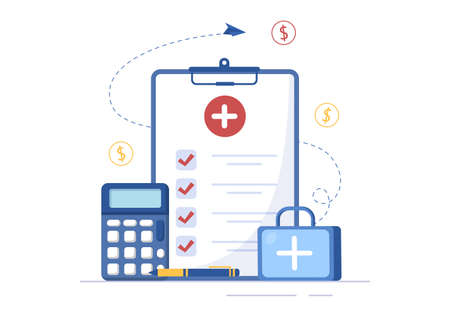

In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white", palette=None,rc={'figure.figsize':(11.7,8.27)})
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import missingno as mnso

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

from sklearn.metrics import r2_score,mean_squared_error , mean_absolute_error,accuracy_score 

**load data**

In [215]:
data_cost=pd.read_csv("/kaggle/input/insurance/insurance.csv")
data_cost.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [216]:
data_cost.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [217]:
data_cost.sample(3)

,age,sex,bmi,children,smoker,region,charges
1062,59,male,41.14,1,yes,southeast,48970.2476
64,20,female,22.42,0,yes,northwest,14711.7438
700,21,female,34.87,0,no,southeast,2020.5523


> **EDA**

In [218]:
data_cost.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [219]:
data_cost.describe(include="object")

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [220]:
data_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [221]:
data_cost.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

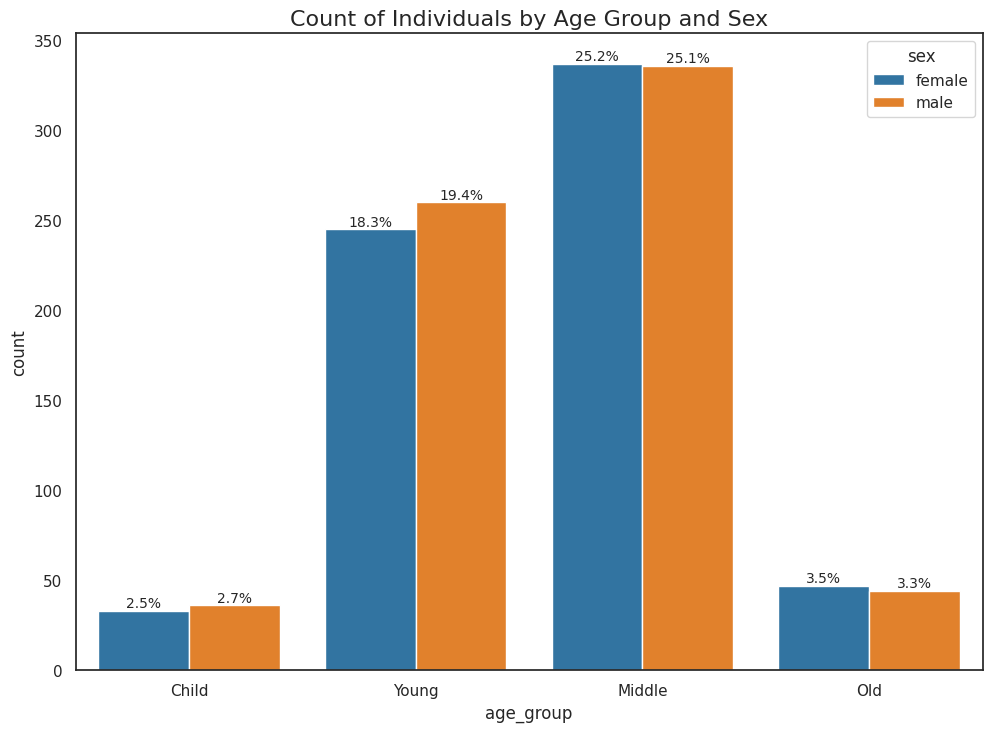

In [222]:
data_cost['age_group'] = pd.cut(data_cost['age'], bins=[0, 18, 35, 60, 100], labels=["Child", "Young", "Middle", "Old"])
ax=sns.countplot(x="age_group",data=data_cost,hue="sex")
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height / len(data_cost))
    ax.text(p.get_x() + p.get_width() / 2., height + 2, percentage, 
            ha="center", fontsize=10)
plt.title("Count of Individuals by Age Group and Sex", fontsize=16)
plt.show()

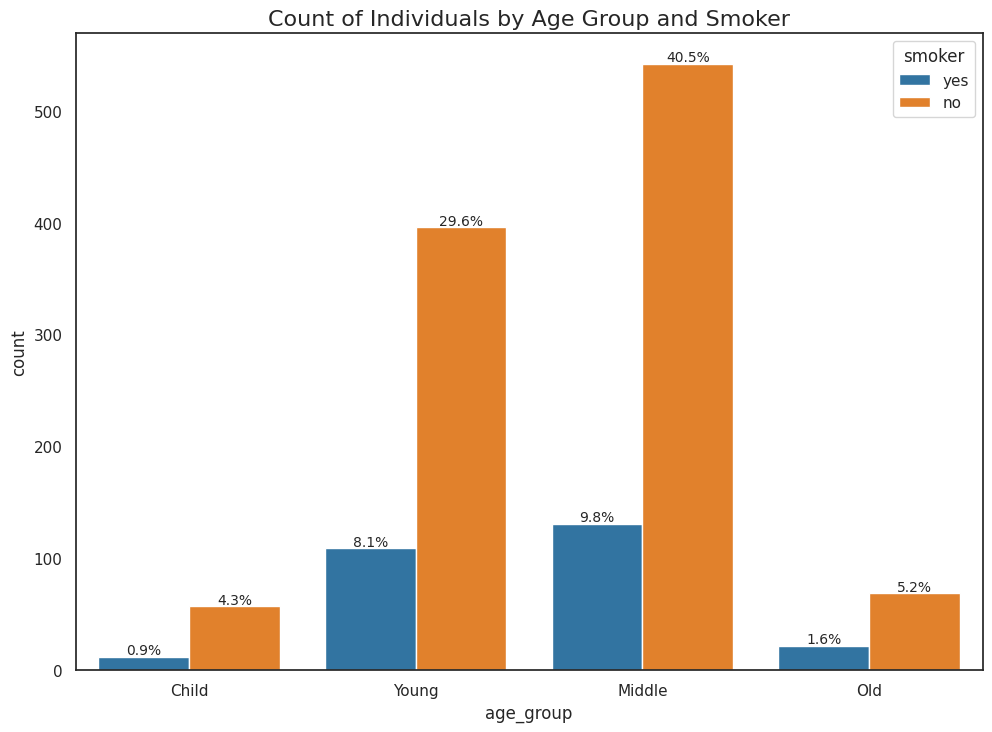

In [223]:
ax=sns.countplot(x="age_group",data=data_cost,hue="smoker")
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height / len(data_cost))
    ax.text(p.get_x() + p.get_width() / 2., height + 2, percentage, 
            ha="center", fontsize=10)
plt.title("Count of Individuals by Age Group and Smoker", fontsize=16)
plt.show()

In [224]:
d_sex=data_cost.sex.value_counts()
d_sex

sex
male      676
female    662
Name: count, dtype: int64

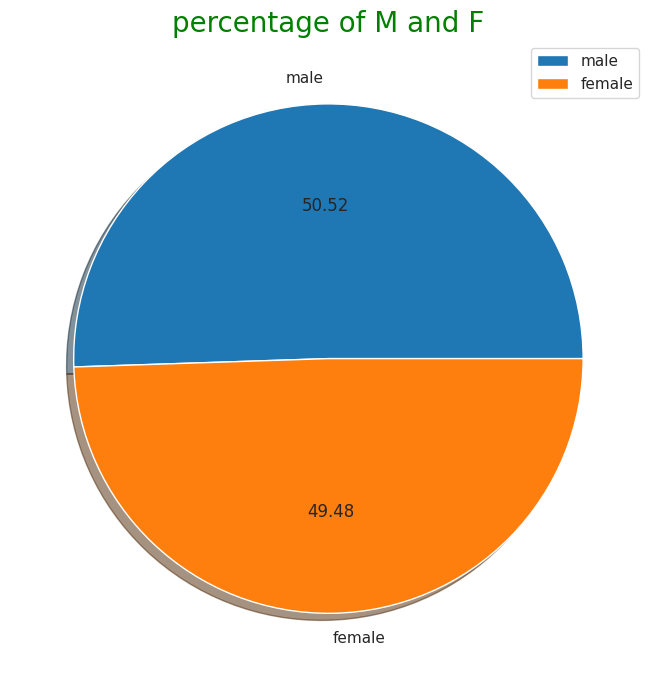

In [225]:
plt.pie(d_sex,labels=d_sex.index,autopct="%.2f",shadow=True)
plt.title("percentage of M and F",fontsize=20,c="g")
plt.legend()
plt.show()

In [226]:
c_data=data_cost.children.value_counts()
c_data

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

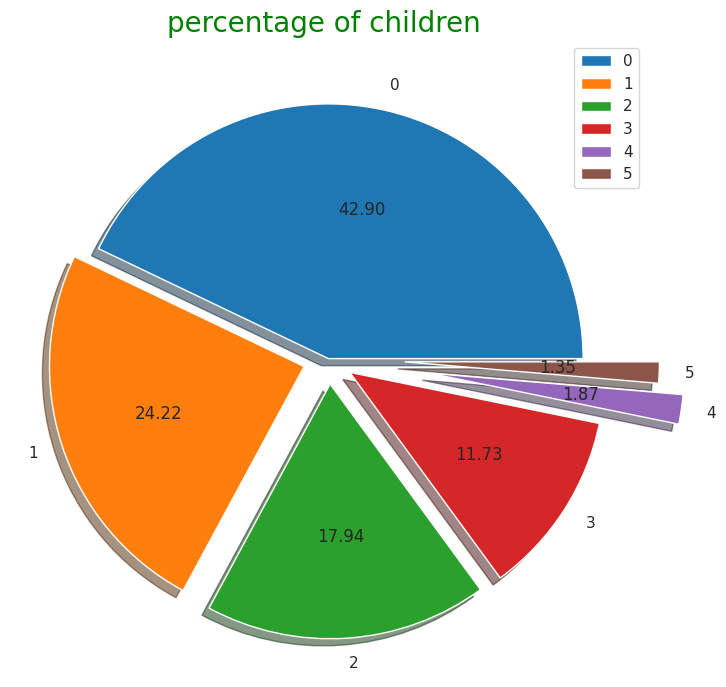

In [227]:
plt.pie(c_data,labels=c_data.index,autopct="%.2f",shadow=True,explode=[0,.1,0.1,0.1,.4,0.3])
plt.title("percentage of children ",fontsize=20,c="g")
plt.legend()
plt.show()

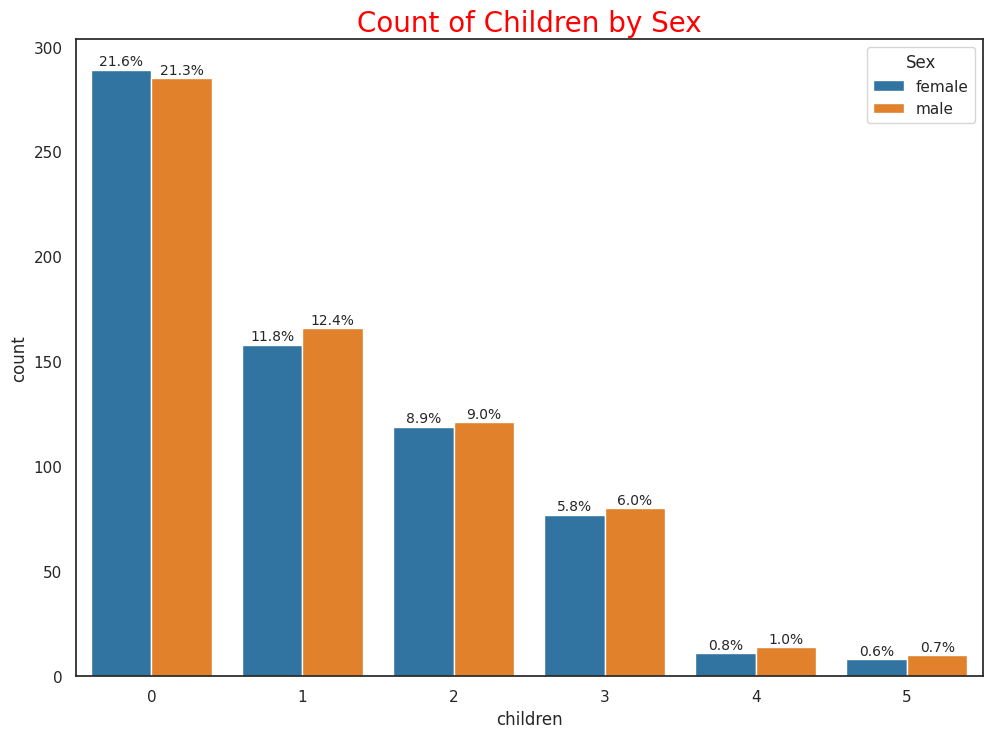

In [228]:
ax=sns.countplot(data=data_cost,x=data_cost.children,hue=data_cost.sex)
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height / len(data_cost))
    ax.text(p.get_x() + p.get_width() / 2., height + 2, percentage, 
            ha="center", fontsize=10)
plt.title("Count of Children by Sex", fontsize=20, color='red')
plt.legend(title="Sex")
plt.show()

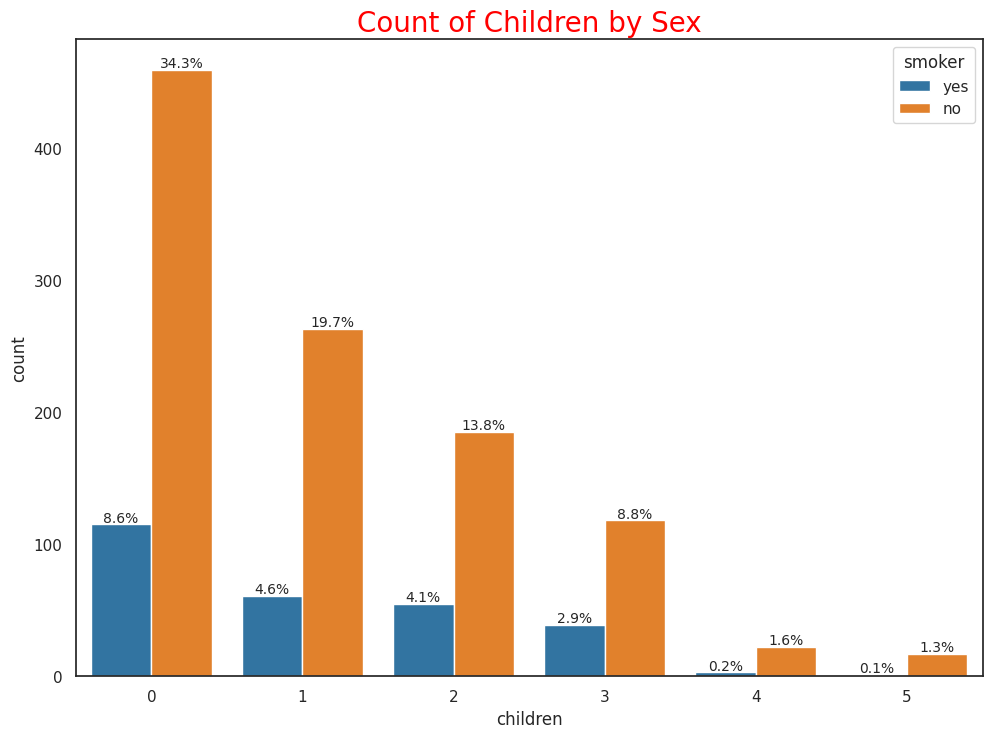

In [229]:
ax=sns.countplot(data=data_cost,x=data_cost.children,hue=data_cost.smoker)
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height / len(data_cost))
    ax.text(p.get_x() + p.get_width() / 2., height + 2, percentage, 
            ha="center", fontsize=10)
plt.title("Count of Children by Sex", fontsize=20, color='red')
plt.legend(title="smoker")
plt.show()

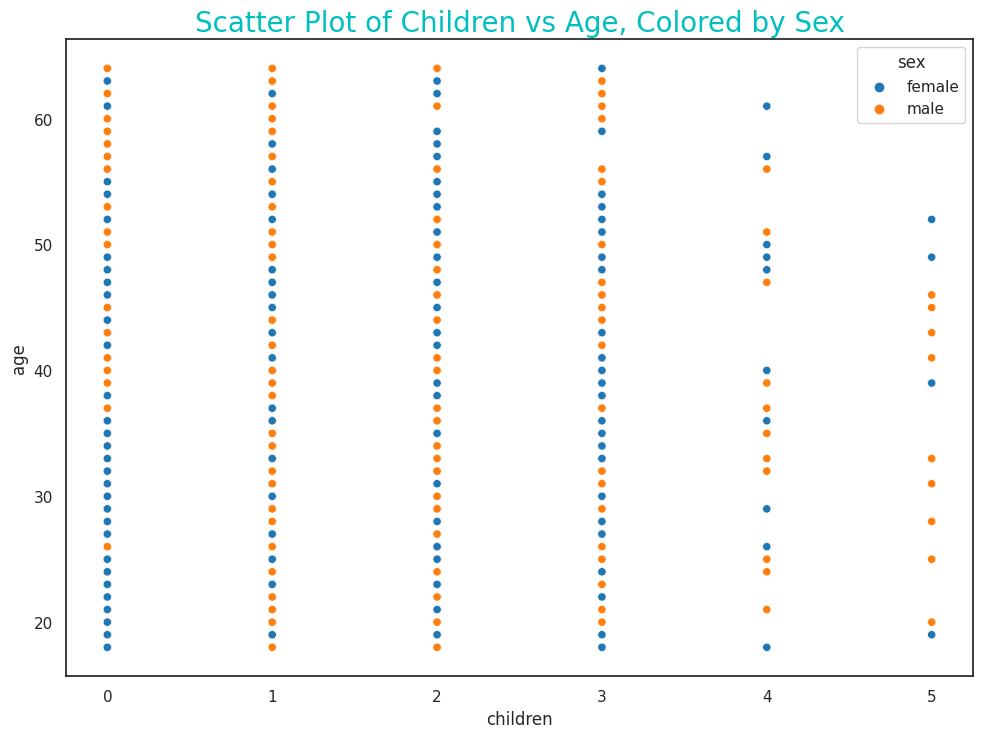

In [230]:
sns.scatterplot(x="children",y="age",data=data_cost,hue="sex")
plt.title("Scatter Plot of Children vs Age, Colored by Sex", fontsize=20,c="c")
plt.legend(title="sex")
plt.show()

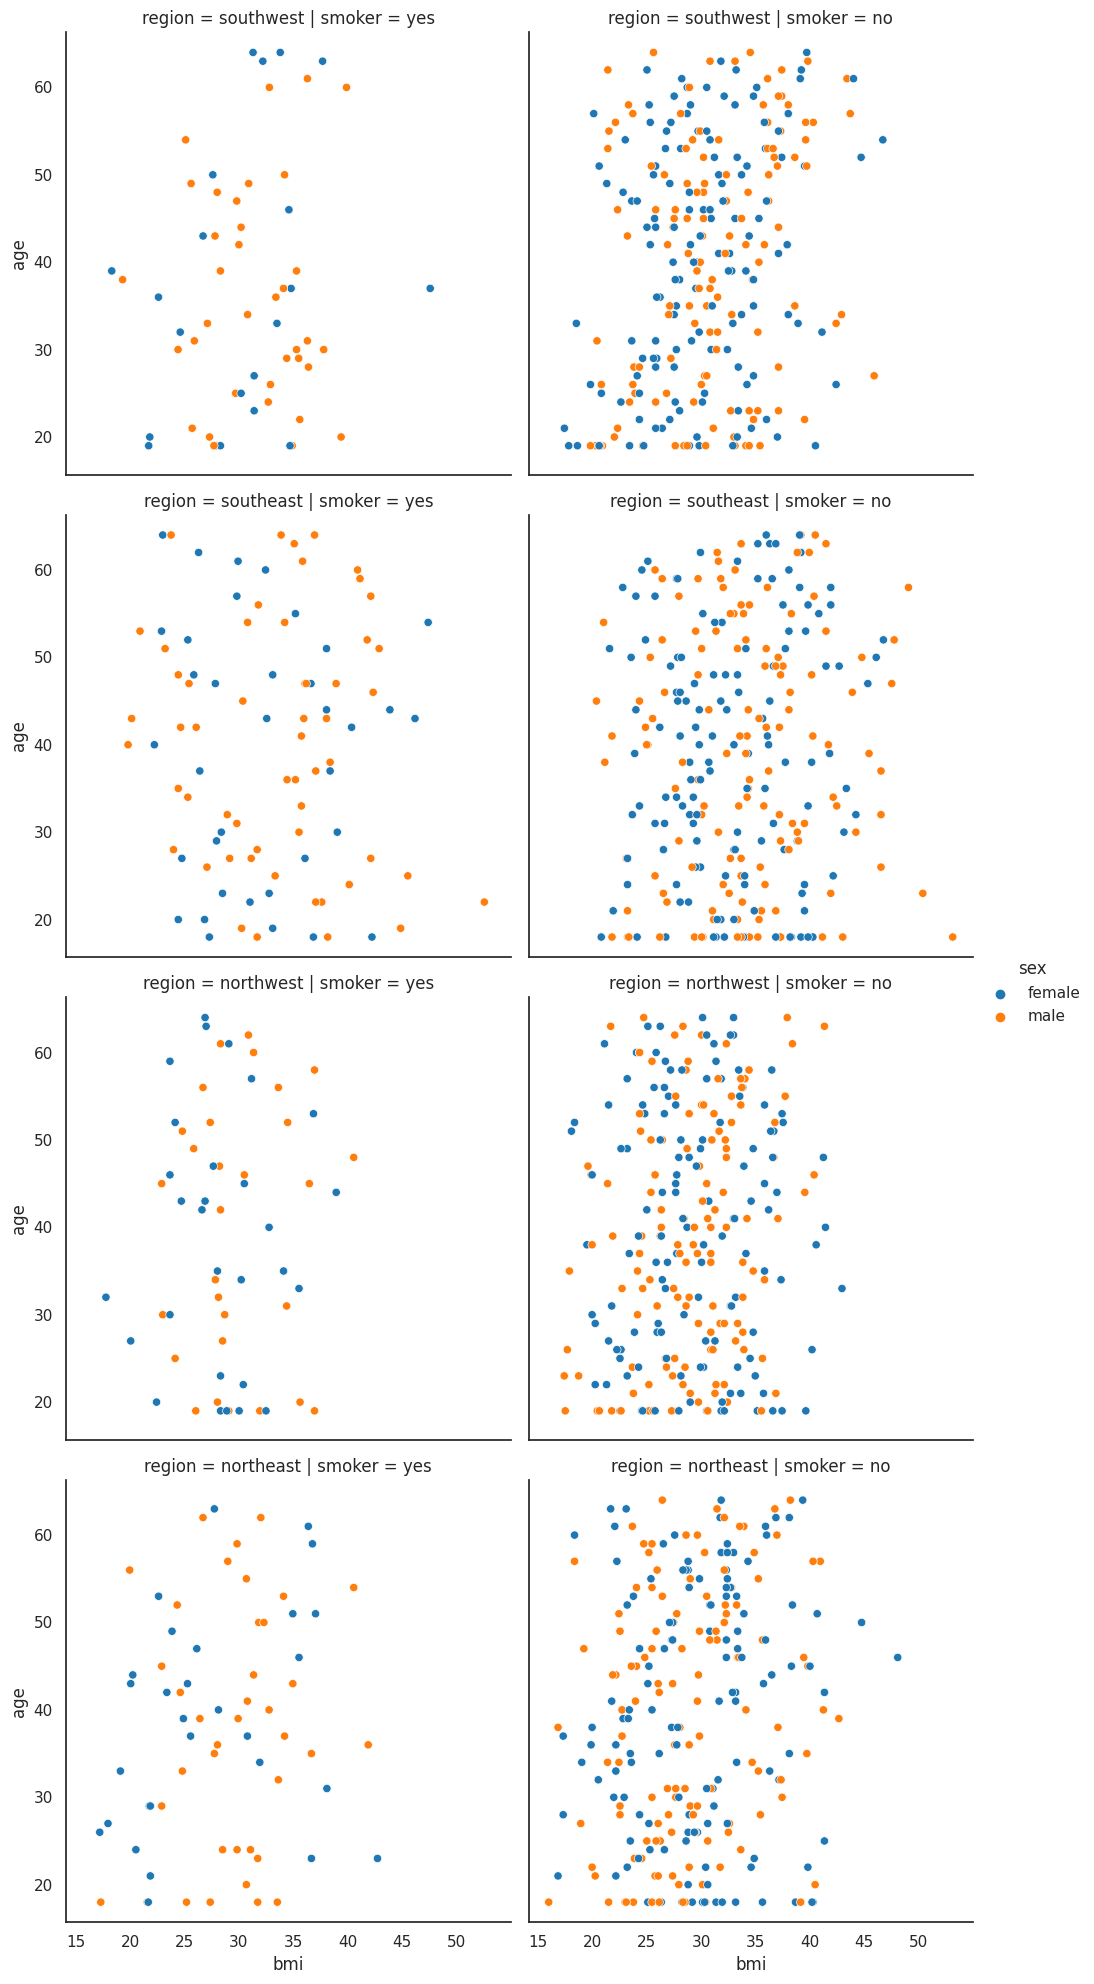

In [231]:
sns.relplot(x="bmi",y="age",data=data_cost,hue="sex",col="smoker",row="region")
plt.show()

In [232]:
l_data=data_cost.region.value_counts()
l_data

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

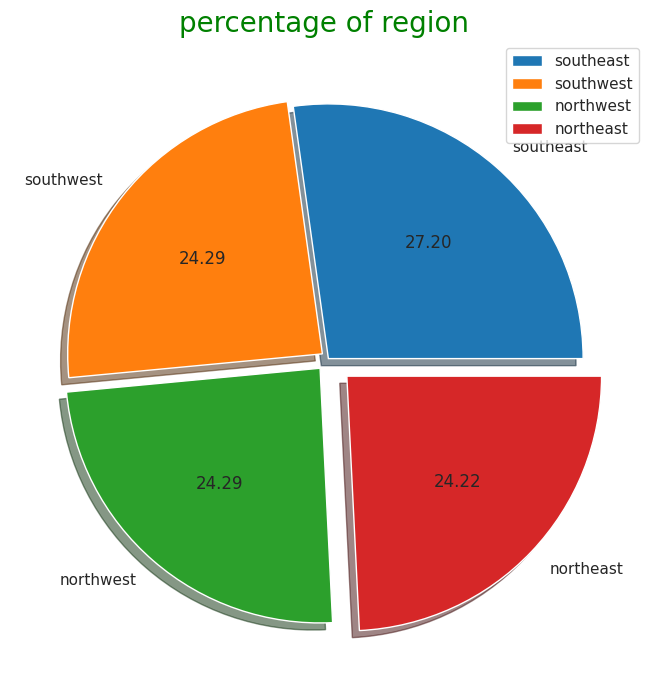

In [233]:
plt.pie(l_data,labels=l_data.index,autopct="%.2f",shadow=True,explode=[0,.03,0.05,0.1])
plt.title("percentage of region ",fontsize=20,c="g")
plt.legend()
plt.show()

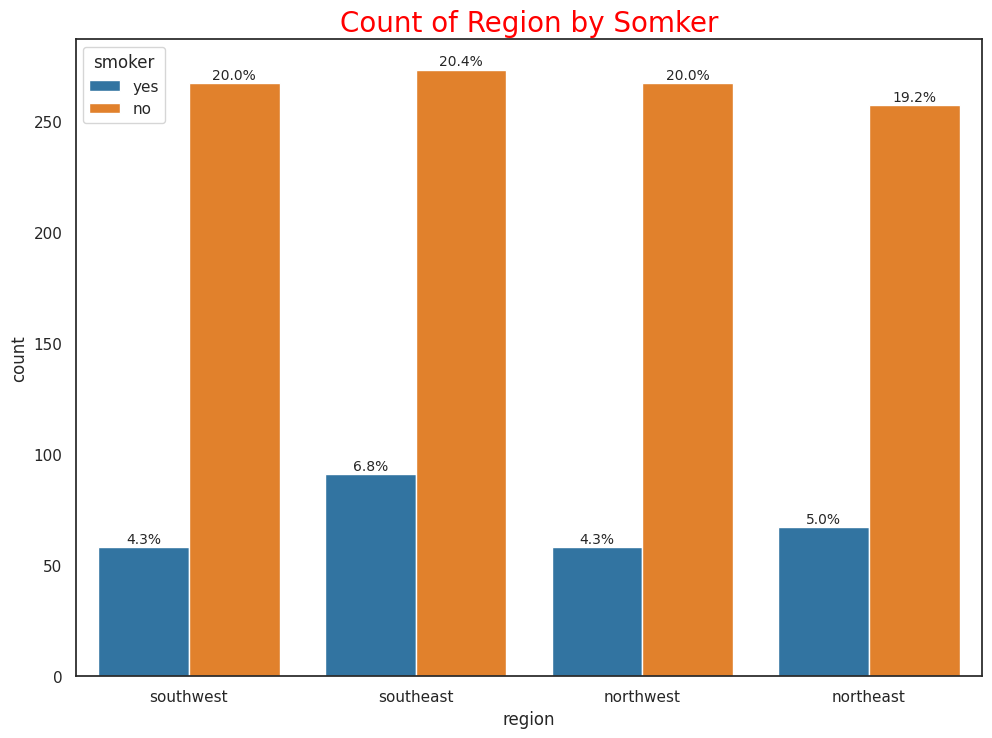

In [234]:
ax=sns.countplot(data=data_cost,x=data_cost.region,hue=data_cost.smoker)
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height / len(data_cost))
    ax.text(p.get_x() + p.get_width() / 2., height + 2, percentage, 
            ha="center", fontsize=10)
plt.title("Count of Region by Somker", fontsize=20, color='red')
plt.legend(title="smoker")
plt.show()

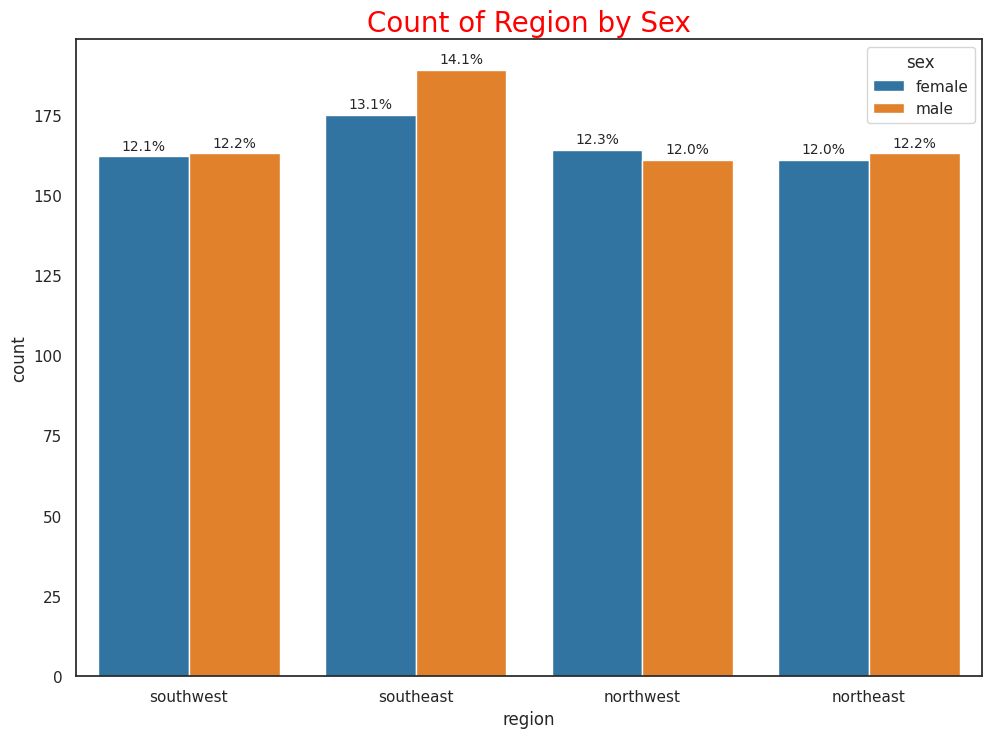

In [235]:
ax=sns.countplot(data=data_cost,x=data_cost.region,hue=data_cost.sex)
for p in ax.patches:
    height = p.get_height()
    percentage = '{:.1f}%'.format(100 * height / len(data_cost))
    ax.text(p.get_x() + p.get_width() / 2., height + 2, percentage, 
            ha="center", fontsize=10)
plt.title("Count of Region by Sex", fontsize=20, color='red')
plt.legend(title="sex")
plt.show()

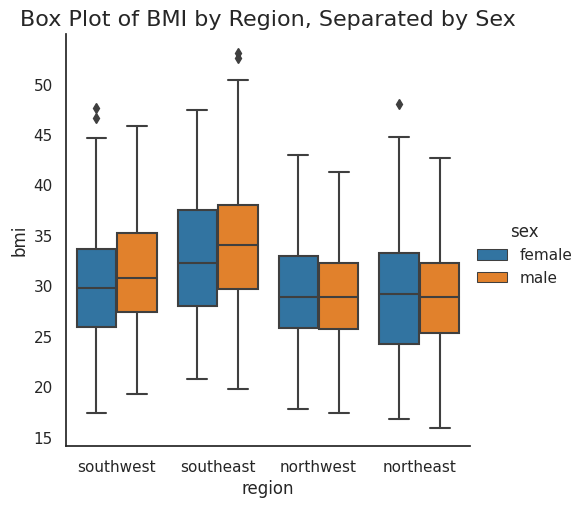

In [236]:
sns.catplot(x="region",y="bmi",data=data_cost,kind="box",hue="sex")
plt.title("Box Plot of BMI by Region, Separated by Sex", fontsize=16)
plt.show()

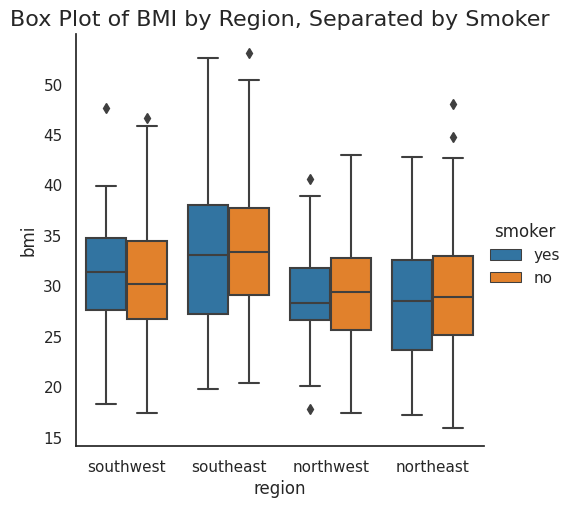

In [237]:
sns.catplot(x="region",y="bmi",data=data_cost,kind="box",hue="smoker")
plt.title("Box Plot of BMI by Region, Separated by Smoker", fontsize=16)
plt.show()

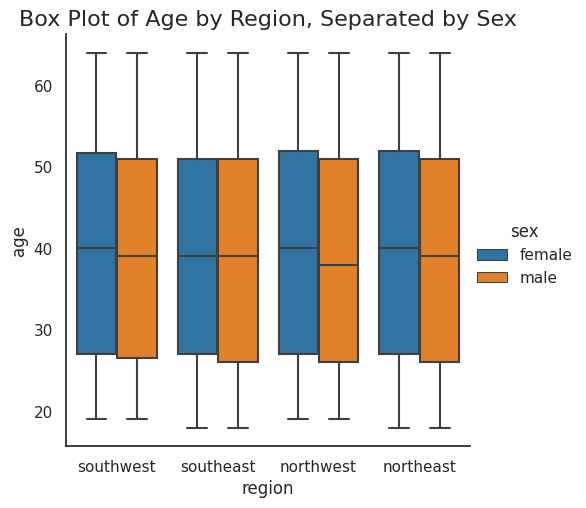

In [238]:
sns.catplot(x="region",y="age",data=data_cost,kind="box",hue="sex")
plt.title("Box Plot of Age by Region, Separated by Sex", fontsize=16)
plt.show()

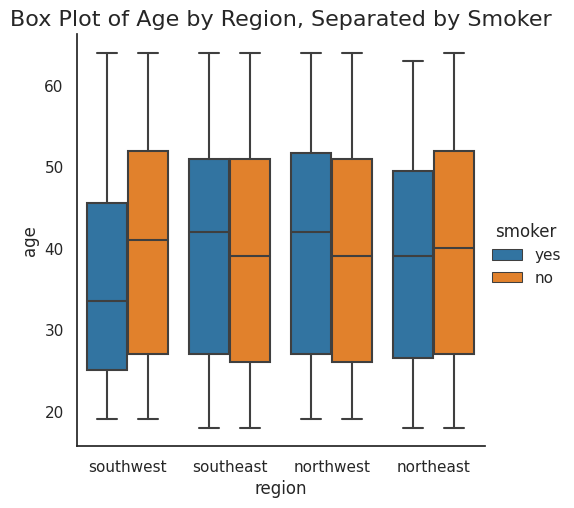

In [239]:
sns.catplot(x="region",y="age",data=data_cost,kind="box",hue="smoker")
plt.title("Box Plot of Age by Region, Separated by Smoker", fontsize=16)
plt.show()

In [240]:
h=data_cost.corr(numeric_only=True)
h

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


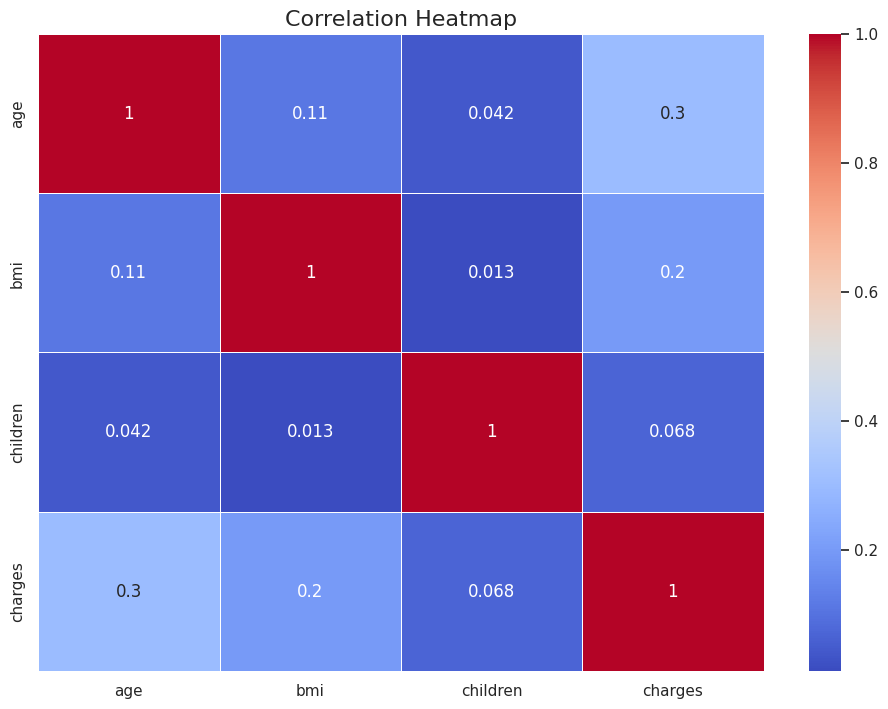

In [241]:
sns.heatmap(h, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

# **Data Preprocesing**

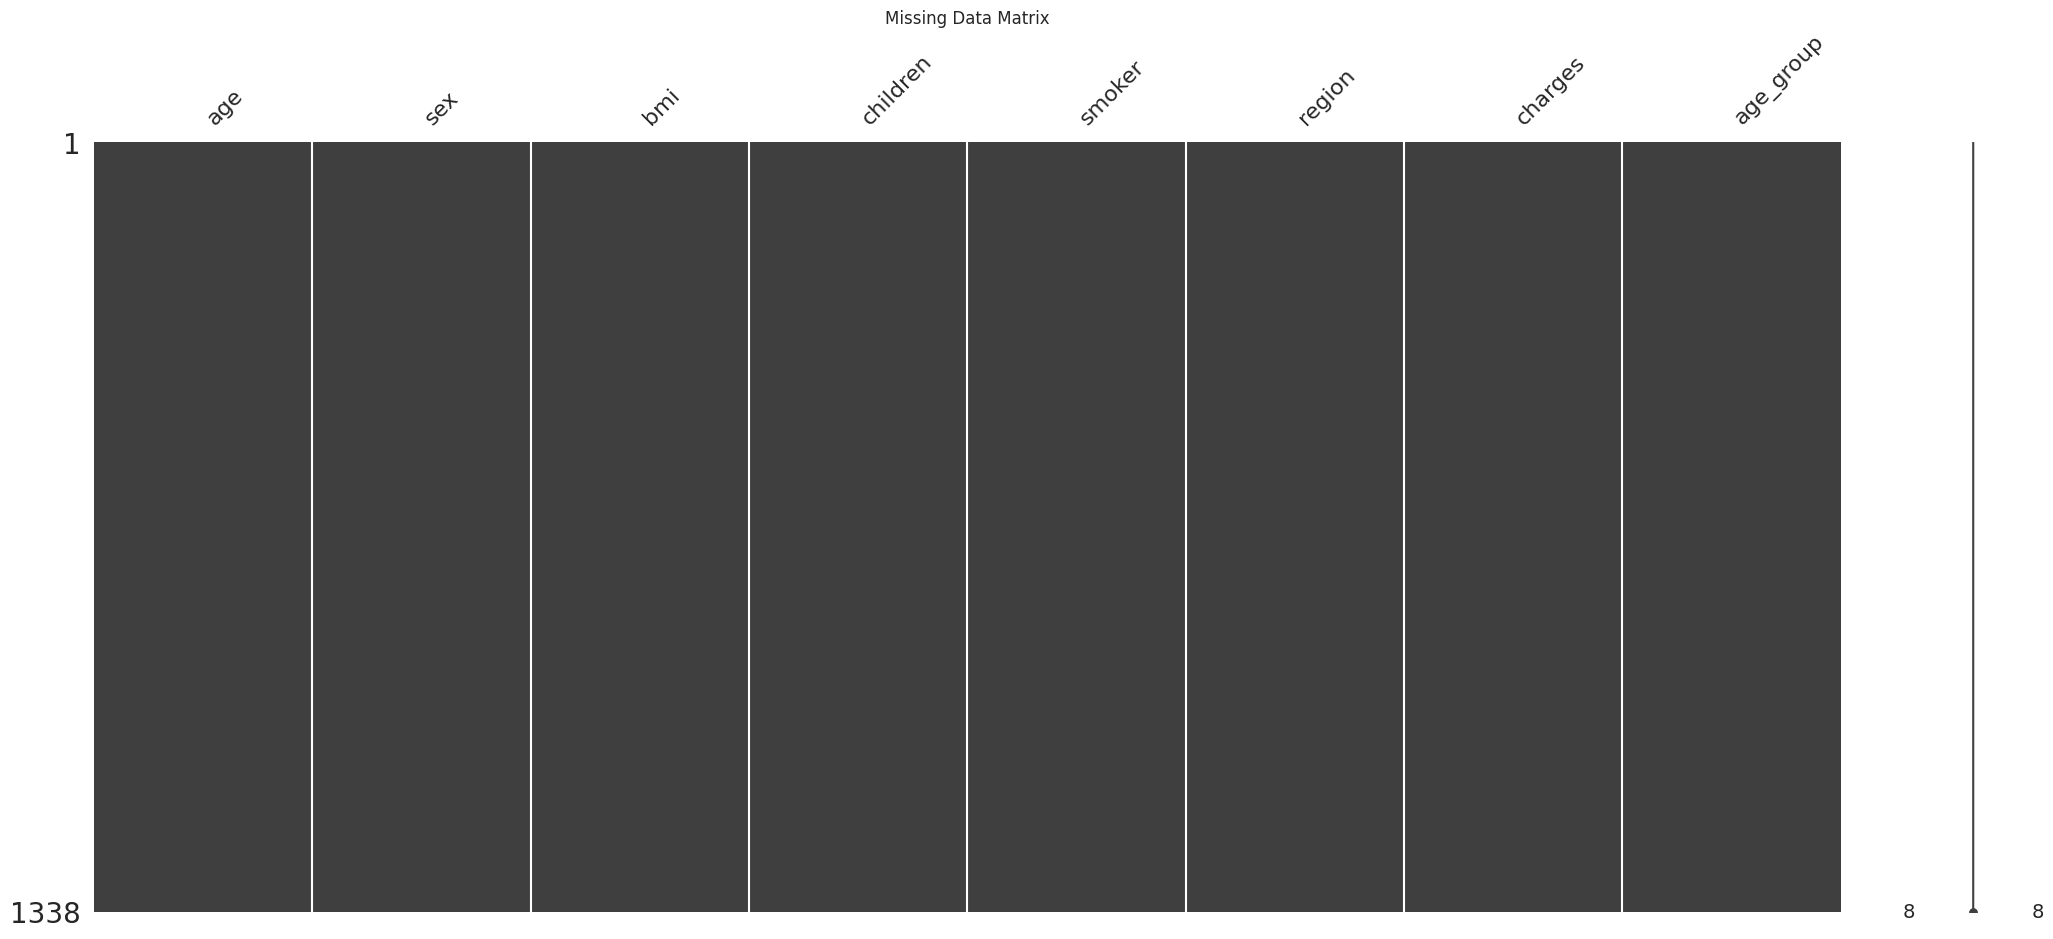

In [242]:
mnso.matrix(data_cost)
plt.title("Missing Data Matrix")
plt.show()

In [243]:
x=data_cost.drop(columns=["charges","age_group"],axis=1)
y=data_cost["charges"]
y=pd.DataFrame(y)

In [244]:
x

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [245]:
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


> **ُEncoder Data**

In [246]:
le=LabelEncoder()
x['sex']=le.fit_transform(x['sex'])
x["smoker"]=le.fit_transform(x["smoker"])
x["region"]=le.fit_transform(x["region"])

In [247]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


> **Split data**

In [248]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=42)

In [249]:
x_train

,age,sex,bmi,children,smoker,region
1046,43,0,25.080,0,0,0
682,39,1,35.300,2,1,3
1037,45,0,30.495,1,1,1
490,19,0,32.900,0,0,3
39,60,1,39.900,0,1,3
...,...,...,...,...,...,...
1095,18,0,31.350,4,0,0
1130,39,0,23.870,5,0,2
1294,58,1,25.175,0,0,0
860,37,0,47.600,2,1,3


In [250]:
x_test

,age,sex,bmi,children,smoker,region
764,45,0,25.175,2,0,0
887,36,0,30.020,0,0,1
890,64,0,26.885,0,1,1
1293,46,1,25.745,3,0,1
259,19,1,31.920,0,1,1
...,...,...,...,...,...,...
644,43,1,35.310,2,0,2
602,56,0,25.300,0,0,3
731,53,1,21.400,1,0,3
321,26,0,29.640,4,0,0


In [251]:
y_train

,charges
1046,7325.04820
682,40103.89000
1037,39725.51805
490,1748.77400
39,48173.36100
...,...
1095,4561.18850
1130,8582.30230
1294,11931.12525
860,46113.51100


# **Model**

> **Multilinear Model**

In [252]:
reg_model=LinearRegression()
reg_model.fit(x_train,y_train)

LinearRegression()

In [253]:
y_pred=reg_model.predict(x_test)
y_pred=pd.DataFrame(y_pred)
y_pred

,0
0,8784.663103
1,7043.981950
2,37000.451569
3,9449.574160
4,27062.629305
...,...
437,11269.626982
438,10079.598118
439,8461.056486
440,6081.197595


In [254]:
print("score_test=", reg_model.score(x_test , y_test)*100)
print("score_train=", reg_model.score(x_train , y_train)*100)
print("mean_squared_error=", mean_squared_error(y_test, y_pred))
print("mean_absolute_error=", mean_absolute_error(y_test, y_pred))
print("r2_score=", r2_score(y_test, y_pred))

score_test= 76.02640802497018
score_train= 74.54841022663419
mean_squared_error= 35132017.869487904
mean_absolute_error= 4204.415654724192
r2_score= 0.7602640802497018


> **Ridge Model**

In [108]:
reg_model=Ridge(alpha=.8)
reg_model.fit(x_train,y_train)

Ridge(alpha=0.8)

In [109]:
y_pred=reg_model.predict(x_test)
y_pred=pd.DataFrame(y_pred)
y_pred

,0
0,8809.986354
1,7068.197189
2,36892.133174
3,9479.434157
4,26965.604045
...,...
437,11298.123308
438,10100.915111
439,8487.838767
440,6112.307357


In [110]:
print("score_test=", reg_model.score(x_test , y_test)*100)
print("score_train=", reg_model.score(x_train , y_train)*100)
print("mean_squared_error=", mean_squared_error(y_test, y_pred))
print("mean_absolute_error=", mean_absolute_error(y_test, y_pred))
print("r2_score=", r2_score(y_test, y_pred))

score_test= 76.01607232112221
score_train= 74.54657914813272
mean_squared_error= 35147164.29112798
mean_absolute_error= 4214.498797066374
r2_score= 0.7601607232112221


> **Lasso Model**

In [111]:
reg_model=Lasso(alpha=.5)
reg_model.fit(x_train,y_train)

Lasso(alpha=0.5)

In [112]:
y_pred=reg_model.predict(x_test)
y_pred=pd.DataFrame(y_pred)
y_pred

,0
0,8785.514428
1,7045.704013
2,36999.234580
3,9448.652143
4,27059.580212
...,...
437,11269.128651
438,10082.184620
439,8461.611315
440,6081.429081


In [113]:
print("score_test=", reg_model.score(x_test , y_test)*100)
print("score_train=", reg_model.score(x_train , y_train)*100)
print("mean_squared_error=", mean_squared_error(y_test, y_pred))
print("mean_absolute_error=", mean_absolute_error(y_test, y_pred))
print("r2_score=", r2_score(y_test, y_pred))

score_test= 76.026444974593
score_train= 74.5484083463998
mean_squared_error= 35131963.7217903
mean_absolute_error= 4204.583645845029
r2_score= 0.76026444974593


> **SVR Model**

In [134]:
sc_x = StandardScaler()
sc_y = StandardScaler()
x_trainv=sc_x.fit_transform(x_train)
x_testv=sc_x.fit_transform(x_test)
y_trainv=sc_y.fit_transform(y_train)
y_testv=sc_y.fit_transform(y_test)
y_trainv=pd.DataFrame(y_trainv)
y_trainv

,0
0,-0.500220
1,2.207890
2,2.176630
3,-0.960919
4,2.874571
...,...
891,-0.728564
892,-0.396349
893,-0.119677
894,2.704391


In [135]:
reg_model=SVR()
reg_model.fit(x_trainv,y_trainv)

SVR()

In [136]:
y_pred=reg_model.predict(x_testv)
y_pred=pd.DataFrame(y_pred)
y_pred

,0
0,-0.254326
1,-0.578190
2,1.347612
3,-0.255929
4,1.115751
...,...
437,-0.353423
438,-0.075244
439,-0.172707
440,-0.591021


In [138]:
print("score_test=", reg_model.score(x_testv , y_testv)*100)
print("score_train=", reg_model.score(x_trainv , y_trainv)*100)
print("mean_squared_error=", mean_squared_error(y_testv, y_pred))
print("mean_absolute_error=", mean_absolute_error(y_testv, y_pred))
print("r2_score=", r2_score(y_testv, y_pred))

score_test= 84.81089472528613
score_train= 85.58387179783458
mean_squared_error= 0.15189105274713863
mean_absolute_error= 0.20062098269907586
r2_score= 0.8481089472528613


> **DecisionTreeRegressor**

In [163]:
reg_model=DecisionTreeRegressor(max_depth=4,random_state=42)
reg_model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [164]:
y_pred=reg_model.predict(x_test)
y_pred=pd.DataFrame(y_pred)
y_pred

,0
0,9468.289914
1,7280.290492
2,27503.008287
3,7280.290492
4,35202.213536
...,...
437,7280.290492
438,12852.324946
439,12852.324946
440,5850.745538


In [165]:
print("score_test=", reg_model.score(x_test , y_test)*100)
print("score_train=", reg_model.score(x_train , y_train)*100)
print("mean_squared_error=", mean_squared_error(y_test, y_pred))
print("mean_absolute_error=", mean_absolute_error(y_test, y_pred))
print("r2_score=", r2_score(y_test, y_pred))

score_test= 84.86293772394255
score_train= 87.17536786230669
mean_squared_error= 22182555.827591624
mean_absolute_error= 2723.6617314861055
r2_score= 0.8486293772394256


> **RandomForestRegressor**

In [187]:
reg_model=RandomForestRegressor(n_estimators=20,max_depth=7,random_state=42)
reg_model.fit(x_train,y_train)

RandomForestRegressor(max_depth=7, n_estimators=20, random_state=42)

In [188]:
y_pred=reg_model.predict(x_test)
y_pred=pd.DataFrame(y_pred)
y_pred

,0
0,9524.317614
1,5467.535841
2,29401.866283
3,8802.676640
4,34604.369569
...,...
437,8051.890007
438,11878.216249
439,12638.679821
440,8196.130104


In [189]:
print("score_test=", reg_model.score(x_test , y_test)*100)
print("score_train=", reg_model.score(x_train , y_train)*100)
print("mean_squared_error=", mean_squared_error(y_test, y_pred))
print("mean_absolute_error=", mean_absolute_error(y_test, y_pred))
print("r2_score=", r2_score(y_test, y_pred))

score_test= 85.51821720652912
score_train= 93.41260286707877
mean_squared_error= 21222278.764575034
mean_absolute_error= 2585.4377636119525
r2_score= 0.8551821720652911


> **GradientBoostingRegressor**

In [258]:
reg_model=GradientBoostingRegressor(learning_rate=.1,n_estimators=20,max_depth=5)
reg_model.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=20)

In [259]:
y_pred=reg_model.predict(x_test)
y_pred=pd.DataFrame(y_pred)
y_pred

,0
0,10320.728263
1,6801.101365
2,25568.726183
3,9335.466397
4,32226.676442
...,...
437,9605.367012
438,13338.989006
439,12414.446897
440,7363.542311


In [260]:
print("score_test=", reg_model.score(x_test , y_test)*100)
print("score_train=", reg_model.score(x_train , y_train)*100)
print("mean_squared_error=", mean_squared_error(y_test, y_pred))
print("mean_absolute_error=", mean_absolute_error(y_test, y_pred))
print("r2_score=", r2_score(y_test, y_pred))

score_test= 85.24015706883176
score_train= 89.04273750368623
mean_squared_error= 21629761.03659127
mean_absolute_error= 2957.7810936471574
r2_score= 0.8524015706883177
